# Import Modules

In [1]:
import os
import sys
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

#import glob

/g/g92/nainap/Virtual_Env/my_personal_env/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/g/g92/nainap/Virtual_Env/my_personal_env/lib/python3.7/site-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "
/collab/usr/gapps/python/build/spack-toss3.3/opt/spack/linux-rhel7-x86_64/gcc-4.9.3/python-3.7.2-asydydmavj2puklmx5t6cu3ruzmg2b3a/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (2.3.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  RequestsDependencyWarning)


# Paths, File Names

In [2]:
netcdf_file_loc = '/p/lustre2/nainap/From_Pankaj/NetCDF_files'
met_em_file = os.path.join(netcdf_file_loc, 'metgrid_output', 'met_em.d01.2013-11-21_06_00_00.nc')
wrfinput_file = os.path.join(netcdf_file_loc, 'real_output_chisholmview', 'wrfinput_d01')
wrfbdy_file_1 = os.path.join(netcdf_file_loc, 'real_output_chisholmview','wrfbdy_d01_width1')
wrfbdy_file_5 = os.path.join(netcdf_file_loc, 'real_output_chisholmview','wrfbdy_d01_width5')

In [3]:
met_em_file

'/p/lustre2/nainap/From_Pankaj/NetCDF_files/metgrid_output/met_em.d01.2013-11-21_06_00_00.nc'

# Load NetCDF Data

In [4]:
met_em = xr.open_dataset(met_em_file)
wrfinput = xr.open_dataset(wrfinput_file)
wrfbdy_1 = xr.open_dataset(wrfbdy_file_1)
wrfbdy_5 = xr.open_dataset(wrfbdy_file_5)

/g/g92/nainap/Virtual_Env/my_personal_env/lib/python3.7/site-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


# Extract Data to Plot

In [5]:
yz_plane_met_cols, yz_plane_met_rows = np.meshgrid(met_em['south_north'], met_em['num_metgrid_levels'])
xz_plane_met_cols, xz_plane_met_rows = np.meshgrid(met_em['west_east'], met_em['num_metgrid_levels'])

In [6]:
yz_plane_cols, yz_plane_rows = np.meshgrid(wrfbdy_5['south_north'], wrfbdy_5['bottom_top'])
xz_plane_cols, xz_plane_rows = np.meshgrid(wrfbdy_5['west_east'], wrfbdy_5['bottom_top'])

In [7]:
qoi = 'U_BXS'
U_BXS = wrfbdy_5[qoi].isel(Time=0).isel(bdy_width=0)
print(U_BXS)

<xarray.DataArray 'U_BXS' (bottom_top: 176, south_north: 200)>
array([[-3.217847e+05, -3.133082e+05, -3.126638e+05, ..., -1.930841e+03,
        -2.081611e+04,  2.666677e+04],
       [-3.237327e+05, -3.153979e+05, -3.149079e+05, ...,  7.469334e+03,
        -1.643186e+04,  3.543684e+04],
       [-3.250616e+05, -3.168246e+05, -3.164388e+05, ...,  1.384776e+04,
        -1.345414e+04,  4.137407e+04],
       ...,
       [ 1.365512e+06,  1.322330e+06,  1.282429e+06, ...,  2.157192e+06,
         2.143298e+06,  2.129903e+06],
       [ 1.318120e+06,  1.276026e+06,  1.237232e+06, ...,  2.161800e+06,
         2.145341e+06,  2.128833e+06],
       [ 1.256930e+06,  1.216507e+06,  1.179758e+06, ...,  2.167268e+06,
         2.148158e+06,  2.128524e+06]], dtype=float32)
Dimensions without coordinates: bottom_top, south_north
Attributes:
    FieldType:    104
    MemoryOrder:  XSZ
    description:  bdy x-wind component
    units:        m s-1
    stagger:      X


In [9]:
qoi = 'MU_BXS'
MU_BXS = wrfbdy_5[qoi].isel(Time=0).isel(bdy_width=0)
MU_BXS_tiled = np.tile(MU_BXS, (wrfbdy_5.dims['bottom_top'], 1))

[[1155.8203 1163.9453 1169.3906 ... 1805.1172 1622.3828 1492.5   ]
 [1155.8203 1163.9453 1169.3906 ... 1805.1172 1622.3828 1492.5   ]
 [1155.8203 1163.9453 1169.3906 ... 1805.1172 1622.3828 1492.5   ]
 ...
 [1155.8203 1163.9453 1169.3906 ... 1805.1172 1622.3828 1492.5   ]
 [1155.8203 1163.9453 1169.3906 ... 1805.1172 1622.3828 1492.5   ]
 [1155.8203 1163.9453 1169.3906 ... 1805.1172 1622.3828 1492.5   ]]


In [10]:
U_BXS_scaled_by_MU_BXS = U_BXS/MU_BXS
#U_BXS_scaled_by_MU_BXS = U_BXS/MU_BXS_tiled
print(U_BXS_scaled_by_MU_BXS)

<xarray.DataArray (bottom_top: 176, south_north: 200)>
array([[-2.7840372e+02, -2.6917780e+02, -2.6737326e+02, ...,
        -1.0696485e+00, -1.2830580e+01,  1.7867182e+01],
       [-2.8008911e+02, -2.7097314e+02, -2.6929233e+02, ...,
         4.1378670e+00, -1.0128224e+01,  2.3743277e+01],
       [-2.8123883e+02, -2.7219885e+02, -2.7060147e+02, ...,
         7.6713934e+00, -8.2928276e+00,  2.7721317e+01],
       ...,
       [ 1.1814229e+03,  1.1360756e+03,  1.0966642e+03, ...,
         1.1950426e+03,  1.3210800e+03,  1.4270708e+03],
       [ 1.1404193e+03,  1.0962939e+03,  1.0580146e+03, ...,
         1.1975955e+03,  1.3223396e+03,  1.4263536e+03],
       [ 1.0874784e+03,  1.0451582e+03,  1.0088654e+03, ...,
         1.2006246e+03,  1.3240762e+03,  1.4261469e+03]], dtype=float32)
Dimensions without coordinates: bottom_top, south_north


In [11]:
MUB = wrfinput['MUB'].isel(Time=0).isel(west_east=0)
MU = wrfinput['MU'].isel(Time=0).isel(west_east=0)
MUB_tiled = np.tile(MUB, (wrfbdy_5.dims['bottom_top'], 1))
MU_tiled = np.tile(MU, (wrfbdy_5.dims['bottom_top'], 1))

In [12]:
U_BXS_scaled_by_MU = U_BXS/(MUB + MU)

In [13]:
U_met_xlo = met_em['UU'].isel(Time=0).isel(west_east_stag=0)

In [17]:
U_inp_xlo = wrfinput['U'].isel(Time=0).isel(west_east_stag=0)

# Plots

In [15]:
cmap_name = 'rainbow'
south_north_label = 'south_north_index'
west_east_label   = 'west_east_index'
bottom_top_label   = 'bottom_top_index'

Text(0.5, 1.0, 'wrfinput[MU]: west_east = 0, tiled (same at all k-levels)')

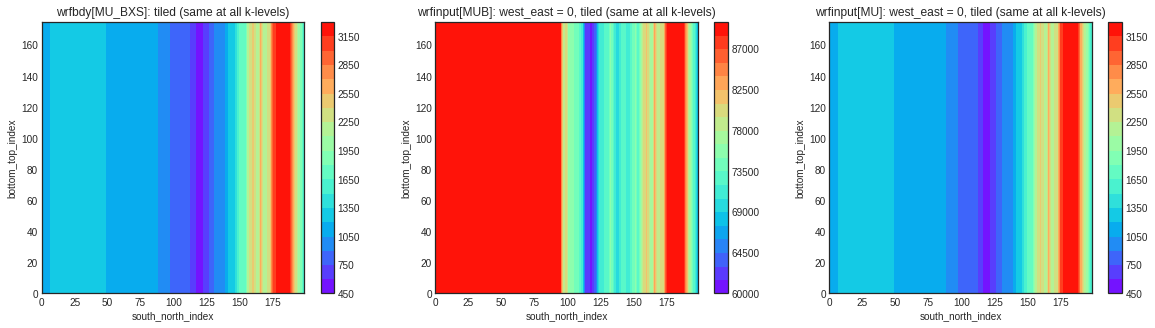

In [18]:
f, axs = plt.subplots(1, 3, figsize = (20, 5) )

plt.subplot(1, 3, 1)
plt.contourf(yz_plane_cols, yz_plane_rows, MU_BXS_tiled, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfbdy[MU_BXS]' + ': tiled (same at all k-levels)')

plt.subplot(1, 3, 2)
plt.contourf(yz_plane_cols, yz_plane_rows, MUB_tiled, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfinput[MUB]' + ': west_east = 0, tiled (same at all k-levels)')

plt.subplot(1, 3, 3)
plt.contourf(yz_plane_cols, yz_plane_rows, MU_tiled, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfinput[MU]' + ': west_east = 0, tiled (same at all k-levels)')

#plt.show()

Text(0.5, 1.0, 'U_BXS: Scaled by MU_BXS')

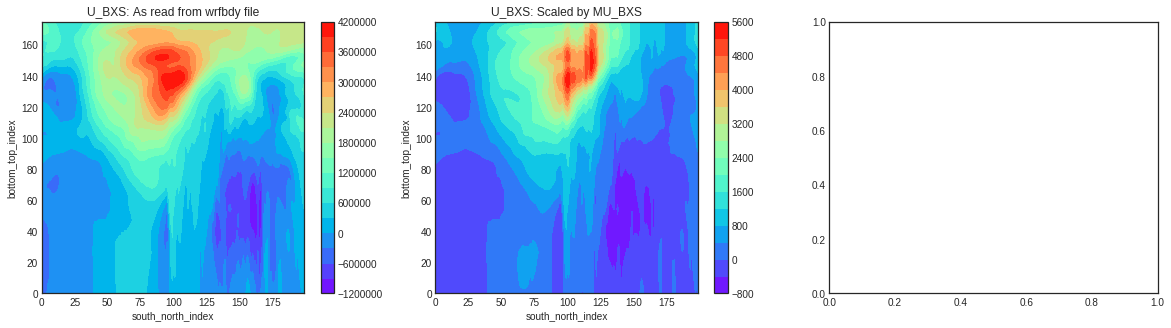

In [19]:
f, axs = plt.subplots(1, 3, figsize = (20, 5) )

plt.subplot(1, 3, 1)
plt.contourf(yz_plane_cols, yz_plane_rows, U_BXS, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('U_BXS' + ': As read from wrfbdy file')

plt.subplot(1, 3, 2)
plt.contourf(yz_plane_cols, yz_plane_rows, U_BXS_scaled_by_MU_BXS, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('U_BXS' + ': Scaled by MU_BXS')


Text(0.5, 1.0, 'met_em[UU]: west_east_stag = 0')

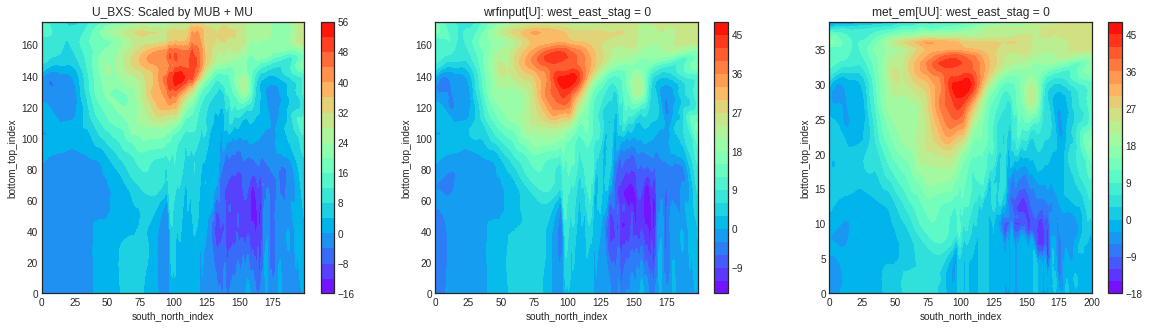

In [20]:
f, axs = plt.subplots(2, 3, figsize = (20, 5) )

plt.subplot(1, 3, 1)
plt.contourf(yz_plane_cols, yz_plane_rows, U_BXS_scaled_by_MU, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('U_BXS' + ': Scaled by MUB + MU')

plt.subplot(1, 3, 2)
plt.contourf(yz_plane_cols, yz_plane_rows, U_inp_xlo, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('wrfinput[U]' + ': west_east_stag = 0')

plt.subplot(1, 3, 3)
plt.contourf(yz_plane_met_cols, yz_plane_met_rows, U_met_xlo, 20, cmap=cmap_name);
plt.colorbar();
plt.xlabel(south_north_label)
plt.ylabel(bottom_top_label)
plt.title('met_em[UU]' + ': west_east_stag = 0')